#  scipy 科学计算

# 常数包和特殊函数包

In [1]:
from scipy import constants as C

In [2]:
C.c

299792458.0

In [3]:
C.h

6.62607015e-34

In [4]:
C.mile

1609.3439999999998

In [5]:
C.inch

0.0254

In [6]:
help(C)

 kg (added in 1.0.0)
    ``slinch``         one inch version of a slug in kg (added in 1.0.0)
    ``slug``           one slug in kg (added in 1.0.0)
    ``oz``             one ounce in kg
    ``ounce``          one ounce in kg
    ``stone``          one stone in kg
    ``grain``          one grain in kg
    ``long_ton``       one long ton in kg
    ``short_ton``      one short ton in kg
    ``troy_ounce``     one Troy ounce in kg
    ``troy_pound``     one Troy pound in kg
    ``carat``          one carat in kg
    ``m_u``            atomic mass constant (in kg)
    ``u``              atomic mass constant (in kg)
    ``atomic_mass``    atomic mass constant (in kg)
    =================  ============================================================
    
    Angle
    -----
    
    =================  ============================================================
    ``degree``         degree in radians
    ``arcmin``         arc minute in radians
    ``arcminute``      arc minute in radian

### 特殊函数

In [7]:
import math
math.log(1+1e-20) #?不准确

0.0

In [8]:
from scipy import special
special.log1p(1e-20)  #泰勒展开

1e-20

In [9]:
special.cbrt(9) #开三次方

2.080083823051904

In [10]:
special.round(3.1) #3.0
special.round(3.5) #4.0
special.round(3.499) #3.0
special.round(4.5) #4.0  ???? #选取最近的偶数


4.0

In [11]:
int(3.5) #直接删掉

3

In [12]:
import numpy as np 


In [13]:
np.round(3.1) #3.0
np.round(3.5) #4.0
np.round(4.5) #4.0 距离最近偶数
np.round(4.456,2) #位数四舍五入

4.46

In [14]:
special.perm(5,3) #排列组合 5*4*3

60.0

In [15]:
special.comb(5,3) # 5*4*3/3*2*1

10.0

In [16]:
help(special)

    -------
        x : ndarray
            Sample points
        w : ndarray
            Weights
        mu : float
            Sum of the weights
        
        See Also
        --------
        scipy.integrate.quadrature
        scipy.integrate.fixed_quad
        numpy.polynomial.chebyshev.chebgauss
        
        References
        ----------
        .. [AS] Milton Abramowitz and Irene A. Stegun, eds.
            Handbook of Mathematical Functions with Formulas,
            Graphs, and Mathematical Tables. New York: Dover, 1972.
    
    ts_roots = roots_sh_chebyt(n, mu=False)
        Gauss-Chebyshev (first kind, shifted) quadrature.
        
        Compute the sample points and weights for Gauss-Chebyshev
        quadrature. The sample points are the roots of the nth degree
        shifted Chebyshev polynomial of the first kind, :math:`T_n(x)`.
        These sample points and weights correctly integrate polynomials of
        degree :math:`2n - 1` or less over the interval :m

# 优化 最小二乘法

### 最小二乘拟合 leastsq

In [17]:
import numpy as np
from scipy.optimize import leastsq

In [18]:
x=np.linspace(-1,1,10)
y=x*2+np.random.random(10)
y

array([-1.8516877 , -0.83298603, -0.89577112,  0.14088828, -0.16360197,
        0.99687621,  0.87900171,  1.58325869,  2.55242133,  2.79614834])

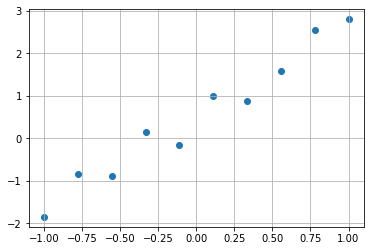

In [19]:
import matplotlib.pyplot as plt 

plt.scatter(x,y)
plt.grid()

In [20]:
## y = kx+b
#输入参数 返回真实值和预测值之间的差值
def residuals(p):
    k,b=p
    return y-(k*x+b)
r=leastsq(residuals,[1,0])
k,b=r[0]
print(k,b)

2.217227546115023 0.5204547739804302


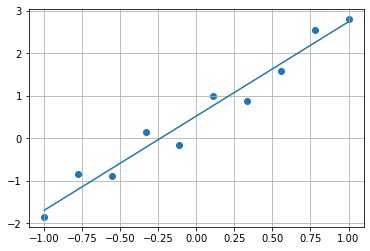

In [21]:
y1=k*x+b
plt.scatter(x,y)
plt.plot(x,y1)
plt.grid()

### 函数最小值 fmin
Rosenbrock 函数  山谷函数

In [22]:
import scipy.optimize as opt


In [23]:
# points = []
#Rosenbrock 函数 山谷函数
def f(p):
    x,y=p    
    z=(1-x)**2+100*(y-x**2)**2
    points.append((x,y,z))
    return z

#f([1,2]) #100


#梯度函数
def fprime(p):
    x,y=p
    dx=2+2*x-400*x*(y-x**2)
    dy=200*y-200*x**2
    return np.array([dx,dy])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 62
         Function evaluations: 119


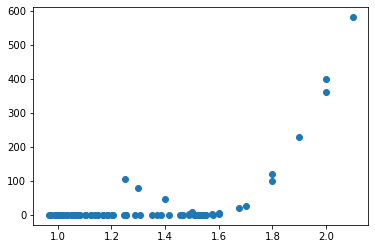

In [24]:
points = []
#梯度下降法 
result=opt.fmin(f,[2,2])
result
ps = np.array(points)
plt.scatter(ps[:,0],ps[:,2])

         Current function value: 0.177220
         Iterations: 3
         Function evaluations: 65
         Gradient evaluations: 53


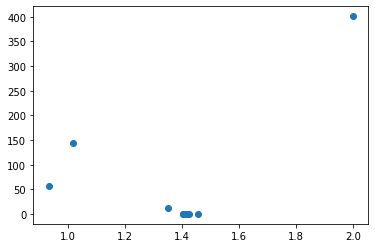

In [25]:
points = []
#共轭梯度法 优化的函数 可微可导
result=opt.fmin_cg(f,[2,2],fprime)
result
ps = np.array(points)
plt.scatter(ps[:,0],ps[:,2])

         Current function value: 0.440871
         Iterations: 5
         Function evaluations: 66
         Gradient evaluations: 54


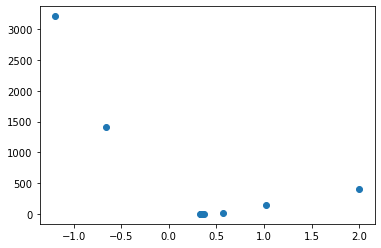

In [26]:
points = []
#共轭牛顿法
result=opt.fmin_bfgs(f,[2,2],fprime)
result
ps = np.array(points)
plt.scatter(ps[:,0],ps[:,2])

### 非线性方程组求解 fsolve

In [27]:
from scipy.optimize import fsolve
from math import sin

In [28]:
def f(x):
    x0,x1,x2=x.tolist()
    return [
        5*x1+3,
        4*x0**2-2*sin(x1*x2),
        x1*x2-1.5
    ]

In [29]:
result=fsolve(f,[1,1,1])
result

array([-0.70622057, -0.6       , -2.5       ])

In [30]:
f(result)

[0.0, -9.126033262418787e-14, 5.329070518200751e-15]

# 最小二乘实验

In [31]:
import numpy as np 
import matplotlib.pyplot as plt 


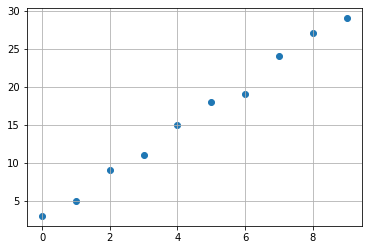

In [32]:
x=np.arange(10)
y=x*3+np.random.randint(1,5,size=10)
plt.scatter(x,y)
plt.grid()

In [33]:
x_mean =np.mean(x)
y_mean = np.mean(y)

k=np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
b=y_mean-k*x_mean
print(k,b)

2.9696969696969697 2.6363636363636367


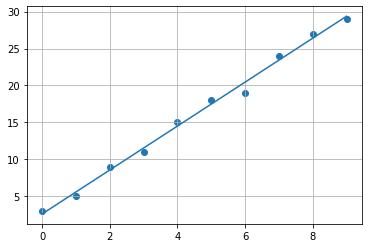

In [34]:
y1=k*x+b
plt.scatter(x,y)
plt.plot(x,y1)
plt.grid()

In [35]:
def leastsq(x,y):
    x_mean =np.mean(x)
    y_mean = np.mean(y)

    k=np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
    b=y_mean-k*x_mean
    return (k,b)

In [36]:
leastsq(x,y)

(2.9696969696969697, 2.6363636363636367)

### 梯度下降法

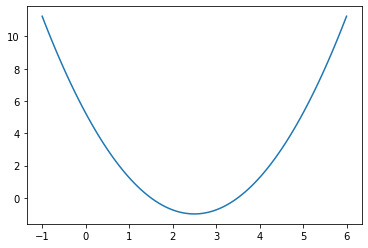

In [37]:
x = np.linspace(-1,6,100)
y = (x-2.5)**2-1
plt.plot(x,y)

In [38]:
 def J(x):
     return (x-2.5)**2-1

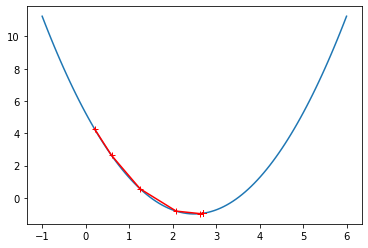

In [39]:
x0=0.0
eta=0.4
last_x=-0.1
x_history=[]
while True:
    dJ=J(x0)-J(last_x)
    if abs(dJ) < 1e-6:
        break
    last_x=x0
    x0=x0-eta*dJ
    x_history.append(x0)


x_history
plt.plot(x,y)
plt.plot(np.array(x_history),J(np.array(x_history)),color='r',marker='+')

# 插值计算
只能对样本数据中间点的值进行插值   超出样本范围 不行

In [40]:
import numpy as np 
from scipy import interpolate #插值模块
import matplotlib.pyplot as plt 

In [41]:
# 拟合 插值都是想得到 某种模型的特性曲线
# 拟合：不需要直线通过所有的点 样本数据比较大的时候
# 插值 要求必须通过所有的点 适合数量比较少的时候，同时暂时不知道用什么曲线去拟合


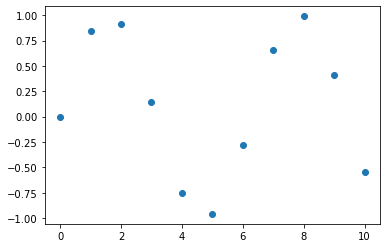

In [42]:
x=np.linspace(0,10,11)
y= np.sin(x)

plt.scatter(x,y)


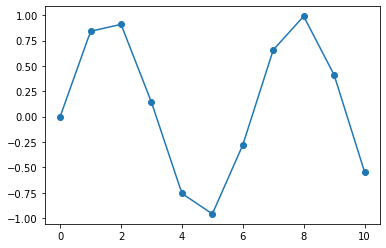

In [43]:
xnew=np.linspace(0,10,100)
f=interpolate.interp1d(x,y,kind='linear')
ynew=f(xnew)
plt.scatter(x,y)
plt.plot(xnew,ynew)

In [58]:
xnew=np.linspace(0,10,100)
for kind in ['slinear','zero','nearest']:
    f=interpolate.interp1d(x,y,kind=kind)
    ynew=f(xnew)
    plt.plot(xnew,ynew)
plt.scatter(x,y)


ValueError: the x array must have exactly one dimension.

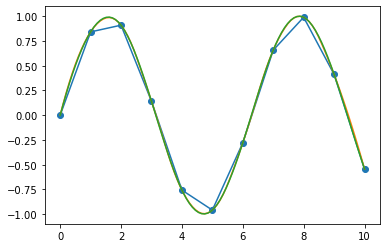

In [45]:
#B样条插值  细木条 可以弯曲 平滑   二次和三次样条插值
xnew=np.linspace(0,10,100)
for kind in ['slinear','quadratic','cubic']:
    f=interpolate.interp1d(x,y,kind=kind)
    ynew=f(xnew)
    plt.plot(xnew,ynew)
plt.scatter(x,y)

In [46]:
f(5)

array(-0.95892427)

In [47]:
# f(10.5) #不能超出范围  fail：A value in x_new is above the interpolation range.

ValueError: A value in x_new is above the interpolation range.

## 外推插值
 UnivariateSpline

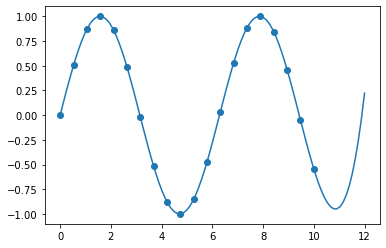

In [48]:
x1=np.linspace(0,10,20)
y1=np.sin(x1)

sx1=np.linspace(0,12,100)
sy1=interpolate.UnivariateSpline(x1,y1,s=0)(sx1)
plt.scatter(x1,y1)
plt.plot(sx1,sy1)

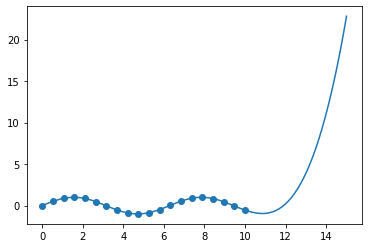

In [49]:
#但是不能做很大的外推  只能做近距离的外推
x1=np.linspace(0,10,20)
y1=np.sin(x1)

sx1=np.linspace(0,15,100)
sy1=interpolate.UnivariateSpline(x1,y1,s=0)(sx1)
plt.scatter(x1,y1)
plt.plot(sx1,sy1)

# 二次插值

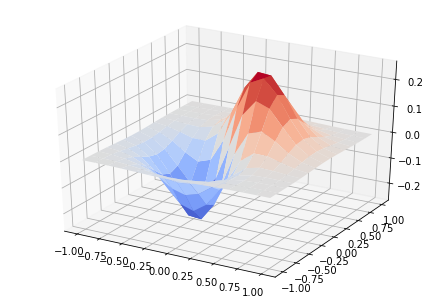

In [50]:
def func(x,y):
    return(x+y)*np.exp(-5.0*(x**2+y**2))
y,x=np.mgrid[-1:1:15j,-1:1:15j] #-1 1 之间取 15个值 注意j
fvals =func(x,y)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
from matplotlib import cm  #颜色模式
fig = plt.figure()
ax=Axes3D(fig) #用三维库包装
ax.plot_surface(x,y,fvals,cmap=cm.coolwarm)


In [57]:
newfunc=interpolate.interp2d(x,y,fvals,kind='cubic')
xnew=np.linspace(-1,1,100)
ynew=np.linspace(-1,1,100)
fnew=newfunc(xnew,ynew)


fig = plt.figure()
ax=Axes3D(fig) #用三维库包装
ynew,xnew = np.mgrid[-1,1,100j,-1,1,100j]
# ax.plot_surface(xnew,ynew,fnew,cmap=cm.coolwarm)

AttributeError: 'int' object has no attribute 'step'

# 线性代数

In [60]:
from scipy import linalg

In [62]:
#方程组求解
#A*x=b
A = np.array([ [1,3,5],[2,5,1],[2,3,8] ])
b= np.array([10,8,3])
x=linalg.solve(A,b)
x

array([-9.28,  5.16,  0.76])

In [63]:
A.dot(x) #=b 结果正确

array([10.,  8.,  3.])

In [64]:
linalg.det(A) #求行列式

-25.000000000000004

In [66]:
l,v=linalg.eig(A) #特征值，特征向量
l

array([10.5540456 +0.j, -0.5873064 +0.j,  4.03326081+0.j])

In [67]:
v

array([[-0.51686204, -0.94195144,  0.11527992],
       [-0.32845853,  0.31778071, -0.81936883],
       [-0.79054957,  0.10836468,  0.56155611]])

In [68]:
# svd 分解 #图像压缩 噪声消除
X = np.array([ [0,0,0,2,2],
               [0,0,0,3,3],
               [0,0,0,1,1],
               [1,1,1,0,0],
               [2,2,2,0,0],
               [5,5,5,0,0],
               [1,1,1,0,0]  ])
U,s,Vh = linalg.svd(X)

In [73]:
U.shape #(7, 7) #左 奇异方阵
np.round(U.dot(U.T)).astype(np.uint8) #先取整再转

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]], dtype=uint8)

In [70]:
s # 奇异特征值

array([9.64365076e+00, 5.29150262e+00, 6.49628424e-16, 1.43063514e-16,
       2.79192092e-17])

In [71]:
Vh.shape #右侧特征方阵

(5, 5)

In [74]:
# X=U*s*Vh
np.round( np.dot(U[:,:5],np.dot(np.diag(s),Vh)) ).astype(np.uint8) #验证

array([[0, 0, 0, 2, 2],
       [0, 0, 0, 3, 3],
       [0, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [2, 2, 2, 0, 0],
       [5, 5, 5, 0, 0],
       [1, 1, 1, 0, 0]], dtype=uint8)

# 数值积分

In [76]:
#求一个半圆 的面积 半径为单位圆 pi*r^2=pi

In [77]:
np.pi/2

1.5707963267948966

In [78]:
def half_circle(x):
    return np.sqrt(1-x**2)

In [82]:
N=100
x=np.linspace(-1,1,N)
dx=x[1]-x[0]
y = half_circle(x)
np.sum(y*dx)

1.569109019600906

In [83]:
np.trapz(y,x) #numpy积分

1.5691090196009048

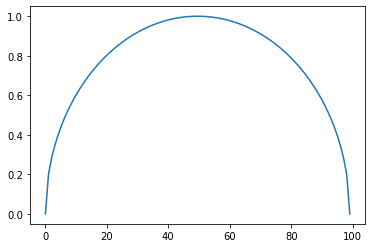

In [84]:
plt.plot(y)

In [88]:
from scipy import integrate
integrate.quad(half_circle,-1,1)  #相对来说 更准确

(1.5707963267948986, 1.0002356720661965e-09)

In [90]:
#二维
def half_sphere(x,y):
    return (1-x**2-y**2)**0.5
integrate.dblquad(half_sphere,-1,1,lambda x:-half_circle(x),lambda x:half_circle(x))


(2.094395102393199, 1.0002356720661965e-09)

# 微分方程

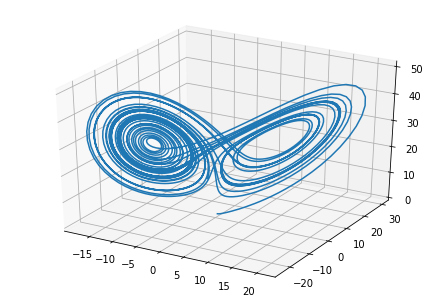

In [96]:
# 洛伦兹吸引子 :位置对时间的导数  混沌效应 蝴蝶效应
def lorenz(w,t,p,r,b):
    x,y,z=w
    return p*(y-x),x*(r-z),x*y-b*z
t = np.arange(0,30,0.01)

from scipy.integrate import odeint
track1 = odeint(lorenz,(0.0,1.0,0.0),t,args=(10.0,28.0,3.0))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track1[:,0],track1[:,1],track1[:,2])

# 信号处理 

In [98]:
## 设计滤波器 怎么从噪声中拿到真正的信号
import numpy as np 
import scipy.signal as signal
import matplotlib.pyplot as plt 


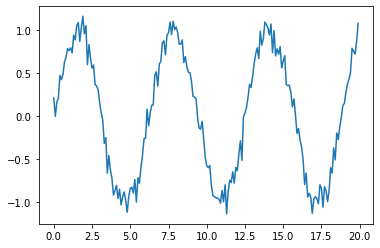

In [103]:
t  = np.arange(0,20,0.1)
x = np.sin(t)
noise = np.random.normal(size=x.shape)*0.1
x_n = x+noise
# plt.plot(t,x)
plt.plot(t,x_n)

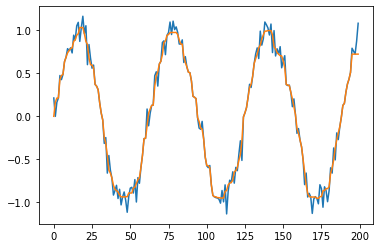

In [106]:
x2=signal.medfilt(x_n,9) # 必须是奇数  #中值滤波
plt.plot(x_n)
plt.plot(x2)

### 图像模糊

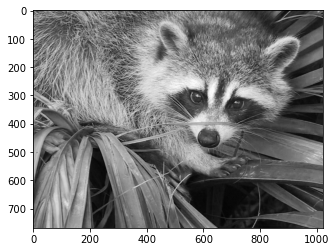

In [110]:
import scipy.misc
img = scipy.misc.face()
gray=img[:,:,0]
plt.gray()
plt.imshow(gray)

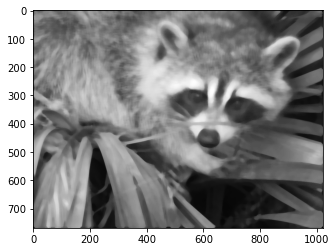

In [116]:
gray1 = signal.medfilt2d(gray,kernel_size=15) # 也是奇数
plt.imshow(gray1)

### 去噪演示

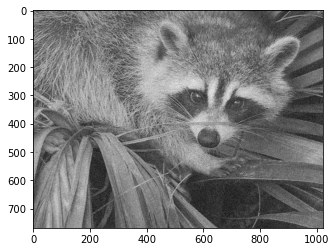

In [136]:

noise = np.random.randint(-50,50,size=gray.shape)
gray_n = gray+noise
plt.imshow(gray_n)

#加噪声结果

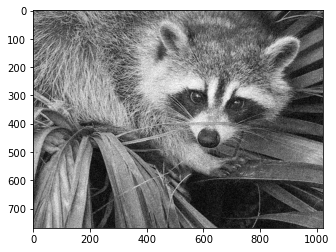

In [137]:

gray_n[gray_n<0]=0
gray_n[gray_n>255]=255
gray_n = gray_n.astype(np.uint8)
plt.imshow(gray_n)

#由于数据类型 溢出

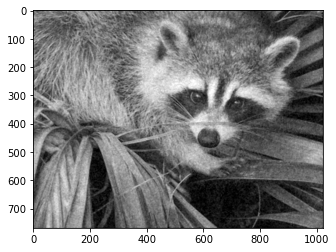

In [141]:
gray2 = signal.medfilt2d(gray_n,kernel_size=5) # 也是奇数  不一定越大越好
plt.imshow(gray2)

# 傅里叶变换

In [148]:
t =np.linspace(0,2*np.pi,50)

In [149]:
s1 = np.sin(t)
s3 = np.sin(3*t)
s5 = np.sin(5*t)
s7 = np.sin(7*t)
s9 = np.sin(9*t)
s11 = np.sin(11*t)
s13 = np.sin(13*t)

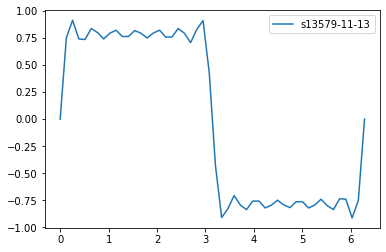

In [154]:
# plt.plot(t,s1,label='s1')
# plt.plot(t,s1+s3/3,label='s13')
# plt.plot(t,s1+s3/3+s5/5,label='s135')
# plt.plot(t,s1+s3/3+s5/5+s7/7,label='s1357')
# plt.plot(t,s1+s3/3+s5/5+s7/7+s9/9,label='s13579')
# plt.plot(t,s1+s3/3+s5/5+s7/7+s9/9+s11/11,label='s13579-11')
plt.plot(t,s1+s3/3+s5/5+s7/7+s9/9+s11/11+s13/13,label='s13579-11-13')
plt.legend()

In [158]:
def signal_sample(t):
    return np.sin(1*np.pi*t)+np.sin(4*np.pi*t)
    # f(t)=sin(0.5*2pi*t)+sin(2*2pi*t)

(0.0, 5.0)

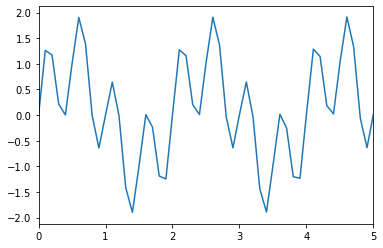

In [159]:
N = 1000
f_s=10
t=np.linspace(0,N/f_s,N)
f_t = signal_sample(t)
plt.plot(t,f_t)
plt.xlim(0,5)

In [160]:
#FFT变换

In [161]:
from scipy import fftpack
F = fftpack.fft(f_t)
f = fftpack.fftfreq(N,1.0/f_s)

(0.0, 2.5)

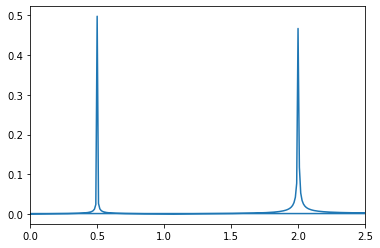

In [163]:
plt.plot(f,np.abs(F)/N)
plt.xlim(0,2.5)

(0.0, 5.0)

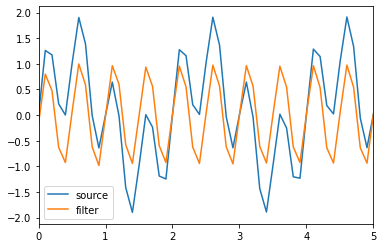

In [171]:
F_filter=F*( abs(f)>1.5 ) #高频特性 >

f_t_filter=fftpack.ifft(F_filter)
plt.plot(t,f_t,label='source')
plt.plot(t,f_t_filter.real,label='filter')
plt.legend()
plt.xlim(0,5)

(0.0, 5.0)

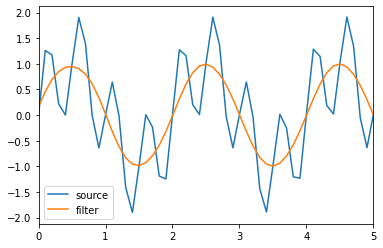

In [172]:
F_filter=F*( abs(f)<1.5 ) #低频特性 <

f_t_filter=fftpack.ifft(F_filter)
plt.plot(t,f_t,label='source')
plt.plot(t,f_t_filter.real,label='filter')
plt.legend()
plt.xlim(0,5)